## Метод опорных векторов

**Библиотеки**

In [3]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler  # Для нормировки данных
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

**1. SVM Classification**

**Выборка**

In [5]:
X, Y = make_classification(n_samples=150, n_features=2,
                           n_informative=2, n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=50,
                                                    random_state=0)

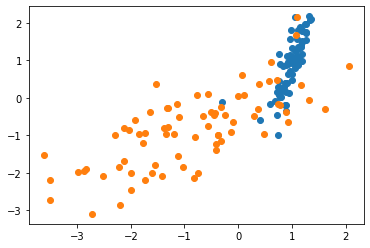

In [7]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
    
plt.show()

**1.1. Линейная модель**

In [8]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)

scikit-learn также решает двойственную задачу, а не прямую.

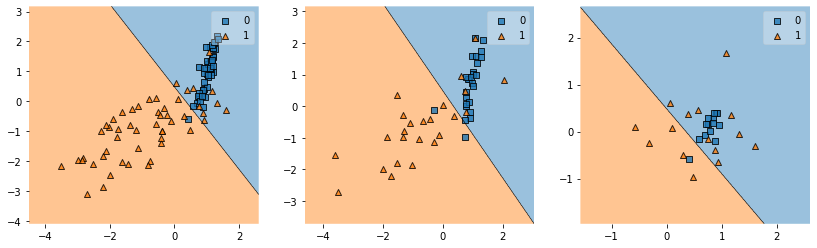

In [9]:
fig, gs = plt.figure(figsize=(14, 4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
    
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_],
                      model, ax=ax[2])

plt.show()

`model.support_` - содержит массив индексов опорных объектов.

**1.2. Ядра для SVM**

**Выборка**

In [11]:
np.random.seed(0)
m = 150
n = 2
X = 10*np.random.randn(m, n)

Y = np.array((X[:, 0]**2 + X[:, 1]**2 + 50*np.random.randn(m))<100,
             dtype=np.int64)
# Выше точки, лежащие в окружности (с небольшим шумом) радиуса 10, помечены
# как один класс, остальные - как другой.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=50,
                                                    random_state=0)

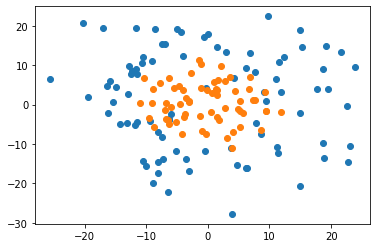

In [12]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
    
plt.show()

**Линейное ядро**

In [13]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)

Очевидно, решение не сойдется так как данные линейно не разделимы.

c:\users\ski6a\appdata\local\programs\python\python37\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\users\ski6a\appdata\local\programs\python\python37\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\users\ski6a\appdata\local\programs\python\python37\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


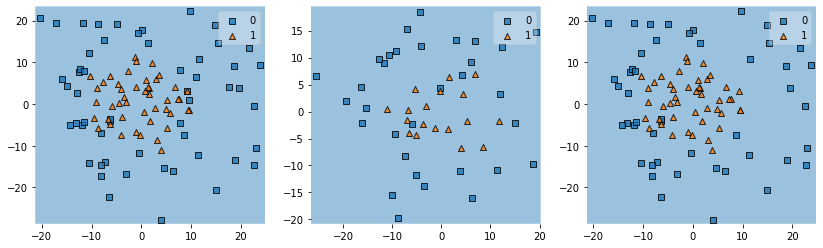

In [14]:
fig, gs = plt.figure(figsize=(14, 4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
    
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_],
                      model, ax=ax[2])

plt.show()

**Полиномиальное ядро**

In [15]:
model = SVC(kernel='poly')
_ = model.fit(X_train, Y_train)

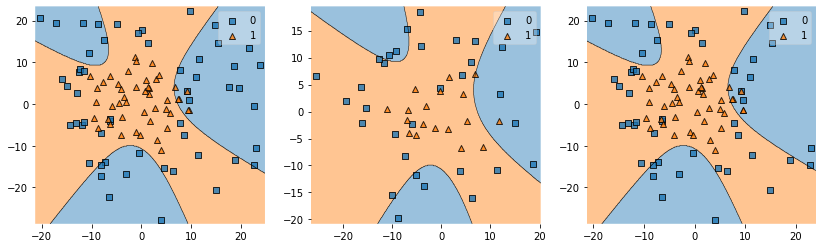

In [16]:
fig, gs = plt.figure(figsize=(14, 4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
    
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_],
                      model, ax=ax[2])

plt.show()

**Сигмоидное ядро**

In [17]:
model = SVC(kernel='sigmoid')
_ = model.fit(X_train, Y_train)

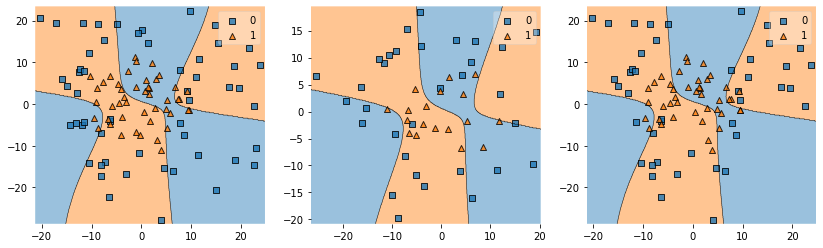

In [18]:
fig, gs = plt.figure(figsize=(14, 4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
    
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_],
                      model, ax=ax[2])

plt.show()

Для реальных задач представленных в scikit-learn ядер не достаточно.

In [19]:
model = SVC(kernel='rbf')
_ = model.fit(X_train, Y_train)

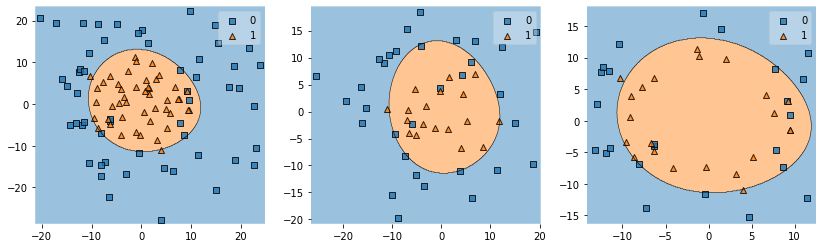

In [20]:
fig, gs = plt.figure(figsize=(14, 4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
    
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_],
                      model, ax=ax[2])

plt.show()

RBF-ядро справилось с задаче.

В реальных задачах во многих случаях RBF-ядро дает хороший результат, но не во всех.

**Собственное ядро**

В качестве пользовательского ядра scikit-learn принимает функцию от двух аргументов.

Для данной задачи, зная как порождена выборка (окружность), можно взять ядро, описывающее радиус:

In [21]:
def kernel(X1, X2):
    return (X1@X2.T)**2

In [22]:
model = SVC(kernel=kernel)
_ = model.fit(X_train, Y_train)

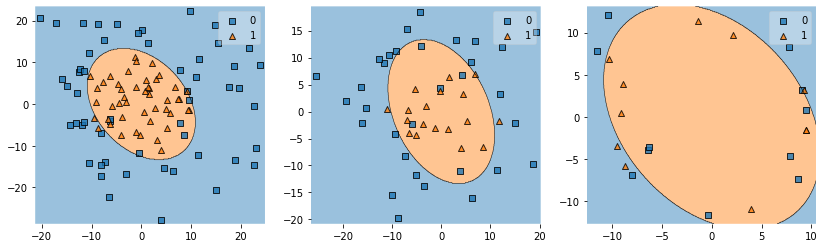

In [23]:
fig, gs = plt.figure(figsize=(14, 4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
    
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_],
                      model, ax=ax[2])

plt.show()

Ввиду того, что функция `plot_decision_regions()` сама выбирает, в каких пределах ей предтсавлять результаты, на картинке в качестве класса $1$ изображен эллипс, но на самом деле он является окружностю.

**2. SVM Regression**

**Выборка**

In [27]:
np.random.seed(0)
l = 150

# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)  # Истинная функция
Y = Y_without_noise + 4*np.random.randn(l)

# Генерация признаков
X = np.array([x, np.sin(x)]).T

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=50,
                                                    random_state=0)

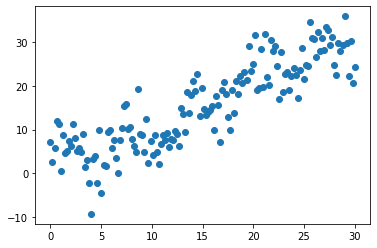

In [28]:
plt.plot(X[:, 0], Y, 'o')

plt.show()

**RBF ядро**

In [30]:
model = SVR(kernel='rbf')
_ = model.fit(X_train, Y_train)

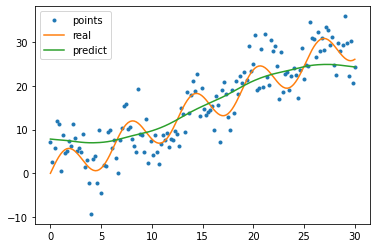

In [31]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()

В данной задаче RBF ядро дает плохое качество.

**Линейное ядро**

In [32]:
model = SVR(kernel='linear')
_ = model.fit(X_train, Y_train)

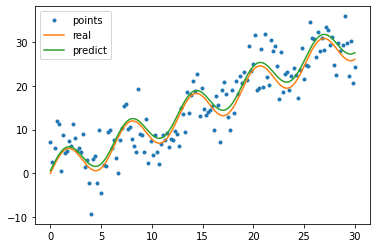

In [33]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()

В данном случае линейное ядро сработало намного лучше, чем RBF ядро и в принципе отлично восстановило исходную функцию.

**Свое ядро**

In [34]:
np.random.seed(0)
l = 150

# Генерация данных
x = np.linspace(0, 30, num=l)
Y_without_noise = x + 4*np.sin(x)  # Истинная функция
Y = Y_without_noise + 4*np.random.randn(l)

# Генерация признаков
X = np.array([x]).T  # Восстанавливаем исключительно по x

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=50,
                                                    random_state=0)

In [35]:
def kernel(X1, X2):
    return np.sin(X1)@np.sin(X2).T + X1@X2.T

То есть мы взяли линейное ядро в простаранстве $\left(x,\sin{x}\right)$.

Таким образом в первом случае априрорные знания об исходных данных были использованы в формировании признаков, а во втором - в формировании скалярного произведения. Оба варианта дают один и тот же результат.

In [36]:
model = SVR(kernel=kernel)
_ = model.fit(X_train, Y_train)

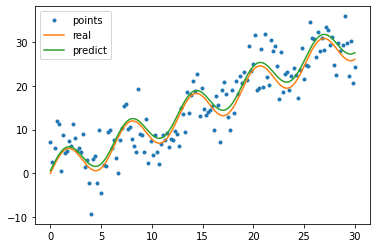

In [37]:
plt.plot(x, Y, '.', label='points')
plt.plot(x, Y_without_noise, label='real')
plt.plot(x, model.predict(X), label='predict')

plt.legend(loc='best')
plt.show()

**3. SVM Feature**

Формирование дополнительных признаков к задаче и повышение качества. В качестве критерия будем смотреть на accuracy.

In [42]:
X, Y = make_classification(n_samples=2500, n_features=10,
                           n_informative=2, n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=10)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=500,
                                                    random_state=0)

In [43]:
# RBF ядро (gamma = 0.05)
def kernel(X1, X2):
    return np.exp(-0.05*cdist(X1, X2)**2)

In [45]:
model = SVC(kernel='rbf')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.91

Получили $91\%$ качества.

Сгенерируем новые признаки. Возьмем опорные объеты, посчитаем к ним скалярные произведения от всех объектов и эти скалярные произведения используем в качестве признаков:

In [46]:
X_train_new = np.hstack([kernel(X_train, X_train[model.support_]), X_train])
X_test_new = np.hstack([kernel(X_test, X_train[model.support_]), X_test])

Таким образом мы с помощью SVM построили новое признаковое описание и с новыми признаками будем пытаться решать задачу.

In [48]:
model = SVC(kernel='rbf')
_ = model.fit(X_train_new, Y_train)
model.score(X_test_new, Y_test)

0.914

Качество немного улучшилось. Здесь важна сама идея использования расстояний до опорных объектов в качестве дополнительных признаков. Но при подобной генерации большого количества признаков, во-первых, необходимо следить, чтобы информации было достаточно (чтобы исходная выборка была достаточно большой); во-вторых - проверять сформированные признаки на линейную зависимость.

**4. Нормировка данных**

**Первая выборка**

Для реальных данных всегда нужно проводить предварительный анализ данных. В частности требуется выполнять нормировку данных. Нормировка данных позволяет повысить устойчивость модели при обучении.

In [49]:
X, Y = make_classification(n_samples=150, n_features=2,
                           n_informative=2, n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=50,
                                                    random_state=0)

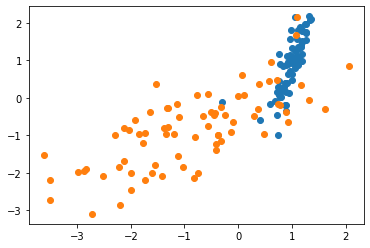

In [50]:
for k in np.unique(Y):
    plt.plot(X[Y==k, 0], X[Y==k, 1], 'o')
    
plt.show()

In [51]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.86

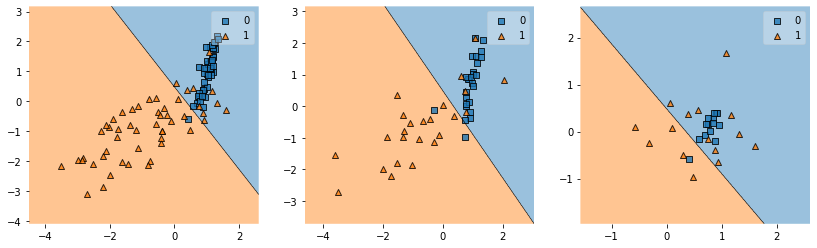

In [52]:
fig, gs = plt.figure(figsize=(14, 4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
    
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_],
                      model, ax=ax[2])

plt.show()

**Вторая выборка**

Сделаем числа очень большими.

In [53]:
np.random.seed(0)
X, Y = make_classification(n_samples=150, n_features=2,
                           n_informative=2, n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=40)

X = (X + 1e3*np.random.randn(1, 2)) * 1e3*np.random.randn(1, 2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=50,
                                                    random_state=0)

In [54]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8

Качество упало.

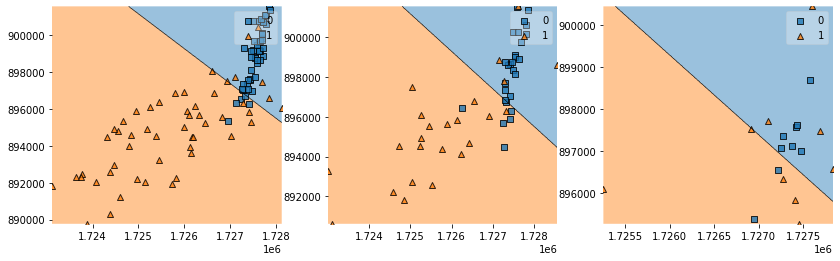

In [55]:
fig, gs = plt.figure(figsize=(14, 4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
    
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_],
                      model, ax=ax[2])

plt.show()

**Нормировка данных**

In [56]:
scaler = StandardScaler()
scaler.fit(X_train)

# коэфф-ы из обучающей выборки применяются для нормировки обеих выборок:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Коэффициенты нормировки (среднее и дисперсия), полученные из обучающей выборки должны применяться и к обучающим данным и к тестовой выборке. Использовать информацию о тесте в момент обучения неправильно.

In [57]:
model = SVC(kernel='linear')
_ = model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.86

Качество после нормировки повысилось.

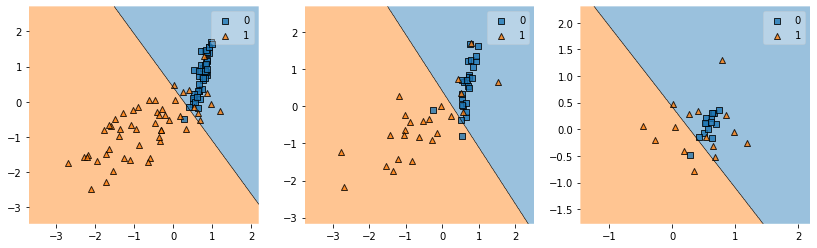

In [58]:
fig, gs = plt.figure(figsize=(14, 4)), gridspec.GridSpec(1, 3)

ax = []
for i in range(3):
    ax.append(fig.add_subplot(gs[i]))
    
plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])
plot_decision_regions(X_train[model.support_], Y_train[model.support_],
                      model, ax=ax[2])

plt.show()